In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [3]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [4]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [7]:
# If the column is named 'Launch site'
site_counts = df['LaunchSite'].value_counts()

# Display the result
print(site_counts)

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [9]:
orbit_counts = df['Orbit'].value_counts()
print(orbit_counts)


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


In [11]:
# Count occurrences of each landing outcome
landing_outcomes = df['Outcome'].value_counts()


In [12]:
for i, outcome in enumerate(landing_outcomes.keys()):
    print(i, outcome)


0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [13]:
# Define failure outcomes
bad_outcomes = set([
    'None None',
    'False Ocean',
    'False RTLS',
    'False ASDS',
    'None ASDS'
])


In [14]:
failed_landings_df = df[df['Outcome'].isin(bad_outcomes)]
print("Number of failed landings:", len(failed_landings_df))


Number of failed landings: 30


In [15]:
# Create the classification list: 1 = success, 0 = failure
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]


In [16]:
df['Class'] = landing_class

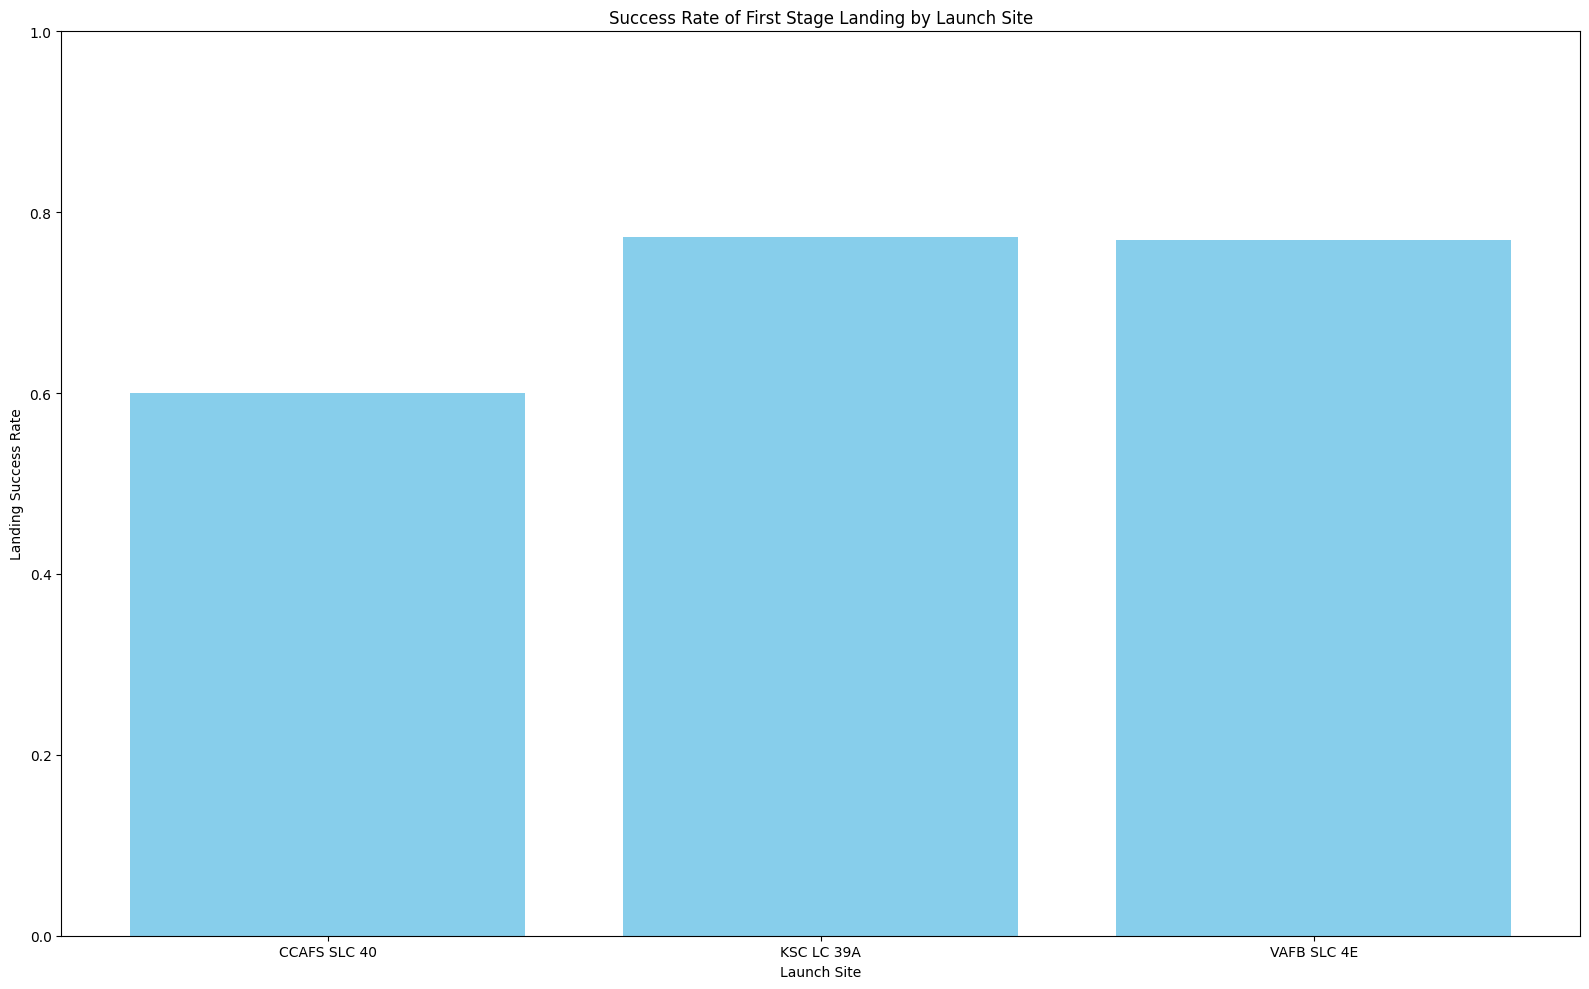

In [37]:
success_rate = df['Class'].mean()

import matplotlib.pyplot as plt

# Group by Launch site and calculate mean Class (success rate)
site_success = df.groupby('LaunchSite')['Class'].mean()

# Plotting
plt.figure(figsize=(16,10))
plt.bar(site_success.index, site_success.values, color='skyblue')
plt.xlabel('Launch Site')
plt.ylabel('Landing Success Rate')
plt.title('Success Rate of First Stage Landing by Launch Site')
plt.ylim(0, 1)  # success rate is between 0 and 1
plt.tight_layout()
plt.show()

In [20]:
gto_launches = df[df['Orbit'] == 'GEO']
print("Number of Falcon 9 launches to geosynchronous orbit (GEO):", len(gto_launches))

Number of Falcon 9 launches to geosynchronous orbit (GEO): 1


In [19]:
drone_ship_landings = df[df['Outcome'] == 'True ASDS']
print("Number of successful drone ship landings (True ASDS):", len(drone_ship_landings))

Number of successful drone ship landings (True ASDS): 41
